In [2]:
# install gromacs library and import it
%pip install gromacs
import gromacs
import numpy as np
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# load mdtraj
import mdtraj as md
# load gro file
traj_300 = md.load('Inputs/T300/adp_exchange4temps.trr', top='Inputs/T300/adp.gro')
traj_350 = md.load('Inputs/T350/adp_exchange4temps.trr', top='Inputs/T350/adp.gro')
traj_400 = md.load('Inputs/T400/adp_exchange4temps.trr', top='Inputs/T400/adp.gro')
traj_450 = md.load('Inputs/T450/adp_exchange4temps.trr', top='Inputs/T450/adp.gro')

(array([[ 4,  6,  8, 14]]), array([[-2.8562374],
       [-2.772521 ],
       [-2.1330607],
       ...,
       [-2.6794333],
       [-1.1632725],
       [-2.7244124]], dtype=float32))


/tmp/ipykernel_1782455/534724122.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(H.T), extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', origin='lower')


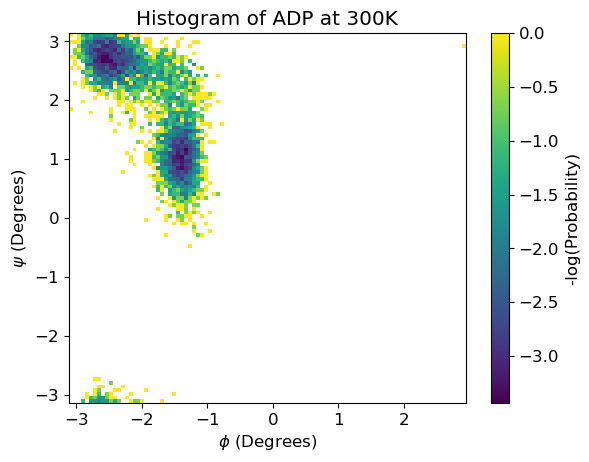

In [35]:
psi = md.compute_psi(traj_300)
# compute phi angle from trajectory
phi = md.compute_phi(traj_300)
print(phi)
# compute a 2d histogram of phi and psi angles
H, xedges, yedges = np.histogram2d(phi[1].flatten(), psi[1].flatten(), bins=100)
# plot the -log of the histogram
plt.imshow(-np.log(H.T), extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', origin='lower')
# add labeled colorbar
plt.colorbar(label='-log(Probability)')
# add axis labels
plt.ylabel('$\psi$ (Degrees)')
plt.xlabel('$\phi$ (Degrees)')
# add title
plt.title('Histogram of ADP at 300K')
# use arial font and make bigger
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.savefig("ADP-Hist300K.png", format="png", bbox_inches="tight")

In [36]:
# load xvg files from T300 directory 
time_300 = np.loadtxt('Inputs/T300/replica_index.xvg')
print(time_300)

[[0.0000e+00 0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00]
 [1.0000e-01 1.0000e+00 0.0000e+00 3.0000e+00 2.0000e+00]
 [2.0000e-01 1.0000e+00 0.0000e+00 3.0000e+00 2.0000e+00]
 ...
 [4.9997e+03 2.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00]
 [4.9998e+03 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00]
 [4.9999e+03 2.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00]]


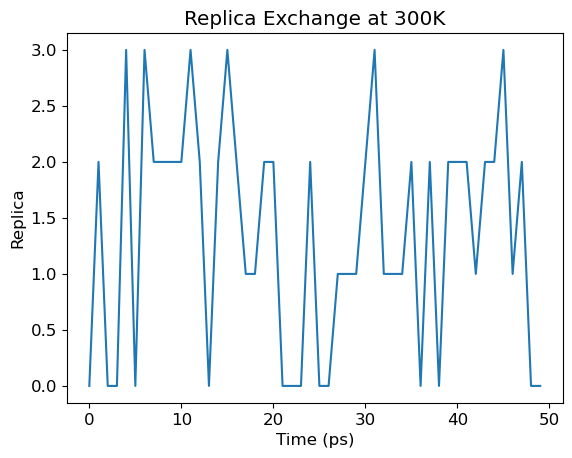

In [37]:
# plot how the replica every 1000 time steps
plt.plot(time_300[::1000,1], label='Replica')
plt.xlabel('Time (ps)')
plt.ylabel('Replica')
# add title
plt.title('Replica Exchange at 300K')
# use arial font and make bigger
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.savefig("ReplicaExchange.png", format="png", bbox_inches="tight")

In [40]:
#plot energy at temperatures
energy3 = np.loadtxt('Inputs/T300/T300-energy.xvg',comments=["@","#"],unpack=True)
energy35 = np.loadtxt('Inputs/T350/T350-energy.xvg',comments=["@","#"],unpack=True)
energy4 = np.loadtxt('Inputs/T400/T400-energy.xvg',comments=["@","#"],unpack=True)
energy45 = np.loadtxt('Inputs/T450/T450-energy.xvg',comments=["@","#"],unpack=True)


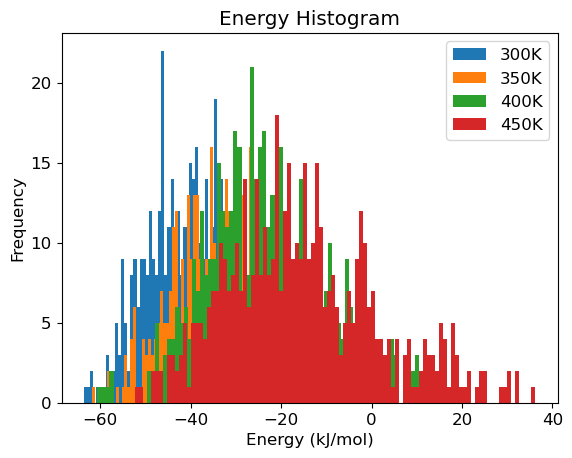

In [45]:
#make histogram of energy of each replica
plt.hist(energy3[1], bins=100, label='300K')
plt.hist(energy35[1], bins=100, label='350K')
plt.hist(energy4[1], bins=100, label='400K')
plt.hist(energy45[1], bins=100, label='450K')
# add title
plt.title('Energy Histogram')
plt.xlabel('Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.legend()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.savefig("Energy-Hist.png", format="png")